### Libraries for dataset manipulation and visulization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
dataset = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Extracted Features\\Formula_Index_with_P_value.csv')

### Preprocessing on dataset

In [3]:
X = np.array(dataset['Formula_Index'])
Y = np.array(dataset['P_Value'])
print(X)
print(Y)

[525.  505.  542.  ... 397.  262.5 365. ]
[5.4 5.4 4.8 ... 5.  5.5 5.5]


In [4]:
X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)
print(X,Y)

[[525. ]
 [505. ]
 [542. ]
 ...
 [397. ]
 [262.5]
 [365. ]] [[5.4]
 [5.4]
 [4.8]
 ...
 [5. ]
 [5.5]
 [5.5]]


### DTR model training

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y)

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators=100, random_state = 0)
regressor.fit(X_train,y_train)

C:\Users\MAHMOO~1\AppData\Local\Temp/ipykernel_13952/3116153416.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


RandomForestRegressor(random_state=0)

### Prediction 

In [7]:
prediction = regressor.predict([[500]])
print(prediction)

[5.33485]


In [8]:
pred = regressor.predict(X_val)
print(pred)

[4.90538333 4.37429631 5.2870635  5.15283095 6.15062262 6.66305256
 5.2870635  4.66290422 4.63861667 6.06473571 5.35552659 5.99168185
 5.57128996 5.38833333 4.32253333 6.84279068 6.94359524 5.15761042
 4.48378333 5.107      4.94844235 5.40922381 5.903      5.10809405
 5.99724841 6.66305256 5.0937188  5.65535714 5.29907817 4.84851627
 4.412      6.37409524 4.72853063 5.0599588  5.0599588  5.01412666
 5.66924017 5.57128996 4.96466667 6.0444     5.78463095 5.2870635
 5.91466667 6.37409524 5.026      6.55362538 5.64909206 4.13877222
 4.82274762 5.0669786  4.6582619  5.2870635  5.10809405 5.7615
 4.63985714 5.09227143 5.41176265 4.236      4.94844235 5.14
 4.55961667 6.31585595 5.8650119  5.75760794 5.0669786  6.84279068
 4.48369524 5.35764235 5.17981548 6.06702021 7.09551373 4.88116667
 4.1355     6.94359524 6.57906746 6.84279068 4.26909167 4.55961667
 4.61245    6.55362538 4.078      5.35552659 4.69142656 5.15283095
 6.31372143 5.10809405 4.44521905 4.66290422 5.0599588  5.0768354
 4.2977

In [9]:
# mse , mae and r2_score values
mae_value = mean_absolute_error(y_val, pred)
mse_value = mean_squared_error(y_val, pred)
r2_score_value = r2_score(y_val, pred)
# Total error with mse , mae and r2_score
print(f"MSE {mse_value}")
print(f"MAE {mae_value}")
print(f"r2_score {r2_score_value}")

MSE 1.9156176882767681
MAE 1.0588917504724737
r2_score -0.1974404444645077


### Visulization

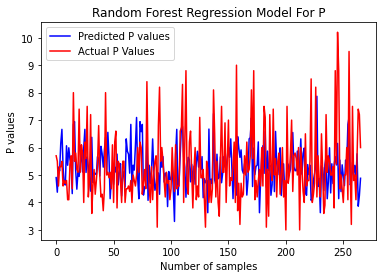

In [10]:
plt.plot(pred,color = 'Blue')
plt.plot(y_val, color = 'red')
plt.title("Random Forest Regression Model For P")
plt.legend(['Predicted P values', 'Actual P Values'], loc='upper left')
plt.xlabel('Number of samples')
plt.ylabel('P values')
plt.savefig("RFRmodelForPestimationUsingFormula.jpg")

In [11]:
from sklearn.metrics import r2_score
r2_score(y_val,pred)

-0.1974404444645077

In [12]:
print(pred)

[4.90538333 4.37429631 5.2870635  5.15283095 6.15062262 6.66305256
 5.2870635  4.66290422 4.63861667 6.06473571 5.35552659 5.99168185
 5.57128996 5.38833333 4.32253333 6.84279068 6.94359524 5.15761042
 4.48378333 5.107      4.94844235 5.40922381 5.903      5.10809405
 5.99724841 6.66305256 5.0937188  5.65535714 5.29907817 4.84851627
 4.412      6.37409524 4.72853063 5.0599588  5.0599588  5.01412666
 5.66924017 5.57128996 4.96466667 6.0444     5.78463095 5.2870635
 5.91466667 6.37409524 5.026      6.55362538 5.64909206 4.13877222
 4.82274762 5.0669786  4.6582619  5.2870635  5.10809405 5.7615
 4.63985714 5.09227143 5.41176265 4.236      4.94844235 5.14
 4.55961667 6.31585595 5.8650119  5.75760794 5.0669786  6.84279068
 4.48369524 5.35764235 5.17981548 6.06702021 7.09551373 4.88116667
 4.1355     6.94359524 6.57906746 6.84279068 4.26909167 4.55961667
 4.61245    6.55362538 4.078      5.35552659 4.69142656 5.15283095
 6.31372143 5.10809405 4.44521905 4.66290422 5.0599588  5.0768354
 4.2977

In [13]:
print(y_val)

[[ 5.7]
 [ 5.5]
 [ 4.6]
 [ 5.3]
 [ 5.3]
 [ 5.5]
 [ 4.6]
 [ 4.8]
 [ 4.7]
 [ 4.8]
 [ 4.1]
 [ 4.1]
 [ 5.4]
 [ 5.7]
 [ 4.5]
 [ 8. ]
 [ 5.5]
 [ 5.8]
 [ 5.2]
 [ 5.1]
 [ 7.4]
 [ 5.1]
 [ 6.1]
 [ 5.8]
 [ 4. ]
 [ 6.2]
 [ 5.6]
 [ 7.5]
 [ 4.2]
 [ 4.8]
 [ 7.2]
 [ 3.6]
 [ 4.6]
 [ 5.2]
 [ 4.3]
 [ 4.8]
 [ 5.4]
 [ 6.8]
 [ 5. ]
 [ 4.2]
 [ 4.3]
 [ 3.7]
 [ 4.5]
 [ 8. ]
 [ 5. ]
 [ 5.1]
 [ 4.9]
 [ 5.1]
 [ 4.5]
 [ 6.1]
 [ 4. ]
 [ 6.2]
 [ 6.6]
 [ 3.8]
 [ 5.5]
 [ 5.4]
 [ 4.8]
 [ 4. ]
 [ 5.5]
 [ 5.5]
 [ 4. ]
 [ 4.5]
 [ 4.5]
 [ 4.6]
 [ 4.4]
 [ 4.8]
 [ 4. ]
 [ 5. ]
 [ 4.8]
 [ 4.6]
 [ 5. ]
 [ 6. ]
 [ 5.1]
 [ 6.2]
 [ 6. ]
 [ 4.3]
 [ 4.7]
 [ 5.2]
 [ 4.5]
 [ 8.4]
 [ 5.5]
 [ 4.5]
 [ 4. ]
 [ 5.3]
 [ 4.1]
 [ 5.1]
 [ 5.5]
 [ 5.7]
 [ 3.1]
 [ 6.8]
 [ 8.2]
 [ 5.5]
 [ 6. ]
 [ 5.5]
 [ 4.8]
 [ 4.2]
 [ 5.1]
 [ 4.7]
 [ 4.8]
 [ 4.1]
 [ 4.5]
 [ 6. ]
 [ 5. ]
 [ 4.4]
 [ 6.1]
 [ 4.5]
 [ 4.6]
 [ 4.6]
 [ 6.6]
 [ 6.7]
 [ 8.3]
 [ 4. ]
 [ 6.2]
 [ 8.8]
 [ 4.6]
 [ 4.3]
 [ 6.2]
 [ 6.6]
 [ 5.1]
 [ 3.8]
 [ 5.2]
 [ 6. ]
 [ 4.1]
 [ 4.6]
 [ 4.2]
